## Train-Test Split Analysis

One final analysis would be to check how would the data distribution look like once we have split the dataset.

According to the paper, it was a 70/30 split

In [18]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

from sklearn.model_selection import train_test_split

In [19]:
load_dotenv()
dataset_path=os.getenv("PROCESSED_ADNI_DATASET")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,1140,0,84.5123,1,25.0,0.150000,169.300000,0.610000,223.340000,36.000000,...,227.925000,0.495000,223.250000,27.445000,665.065000,2.725000,-516.185000,2.638340,2397.0,3164.85
1,1051,1,75.3699,1,26.0,0.097733,175.103337,0.562332,197.321714,42.533788,...,222.355754,0.500577,218.584302,30.381415,651.981453,3.154282,2595.481588,3.146500,1662.5,2648.30
2,15,0,80.9068,0,29.0,0.100000,161.280000,0.540000,174.530000,35.940000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
3,680,0,77.8932,0,28.0,0.110000,235.890000,0.510000,231.560000,41.660000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
4,324,1,75.3534,1,24.0,0.140000,192.290000,0.550000,218.500000,35.280000,...,269.565000,0.390000,219.405000,26.560000,608.050000,2.565000,456.550000,2.444245,1082.0,2550.50


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(["Diagnosis"], axis=1),  
    dataset["Diagnosis"],              
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((366, 23), (158, 23), (366,), (158,))

### Input feature analysis

Lets see how our data looks now after we split it

In [21]:
# Plot each column using histograms
def histogram_plot(x): 
    plt.figure(figsize=(20, 45))

    for i in range(len(X_train.columns)):
        plt.subplot(12,3,i+1)
        sns.histplot(X_train[X_train.columns[i]], color="#5e76fe", kde = True, label="train")
        plt.legend(loc="upper right")

        plt.subplot(12,3,i+1)
        sns.histplot(X_test[X_test.columns[i]], color= "#1e2c78", kde = True, label="test")
        plt.legend(loc="upper right")
                
    plt.tight_layout()


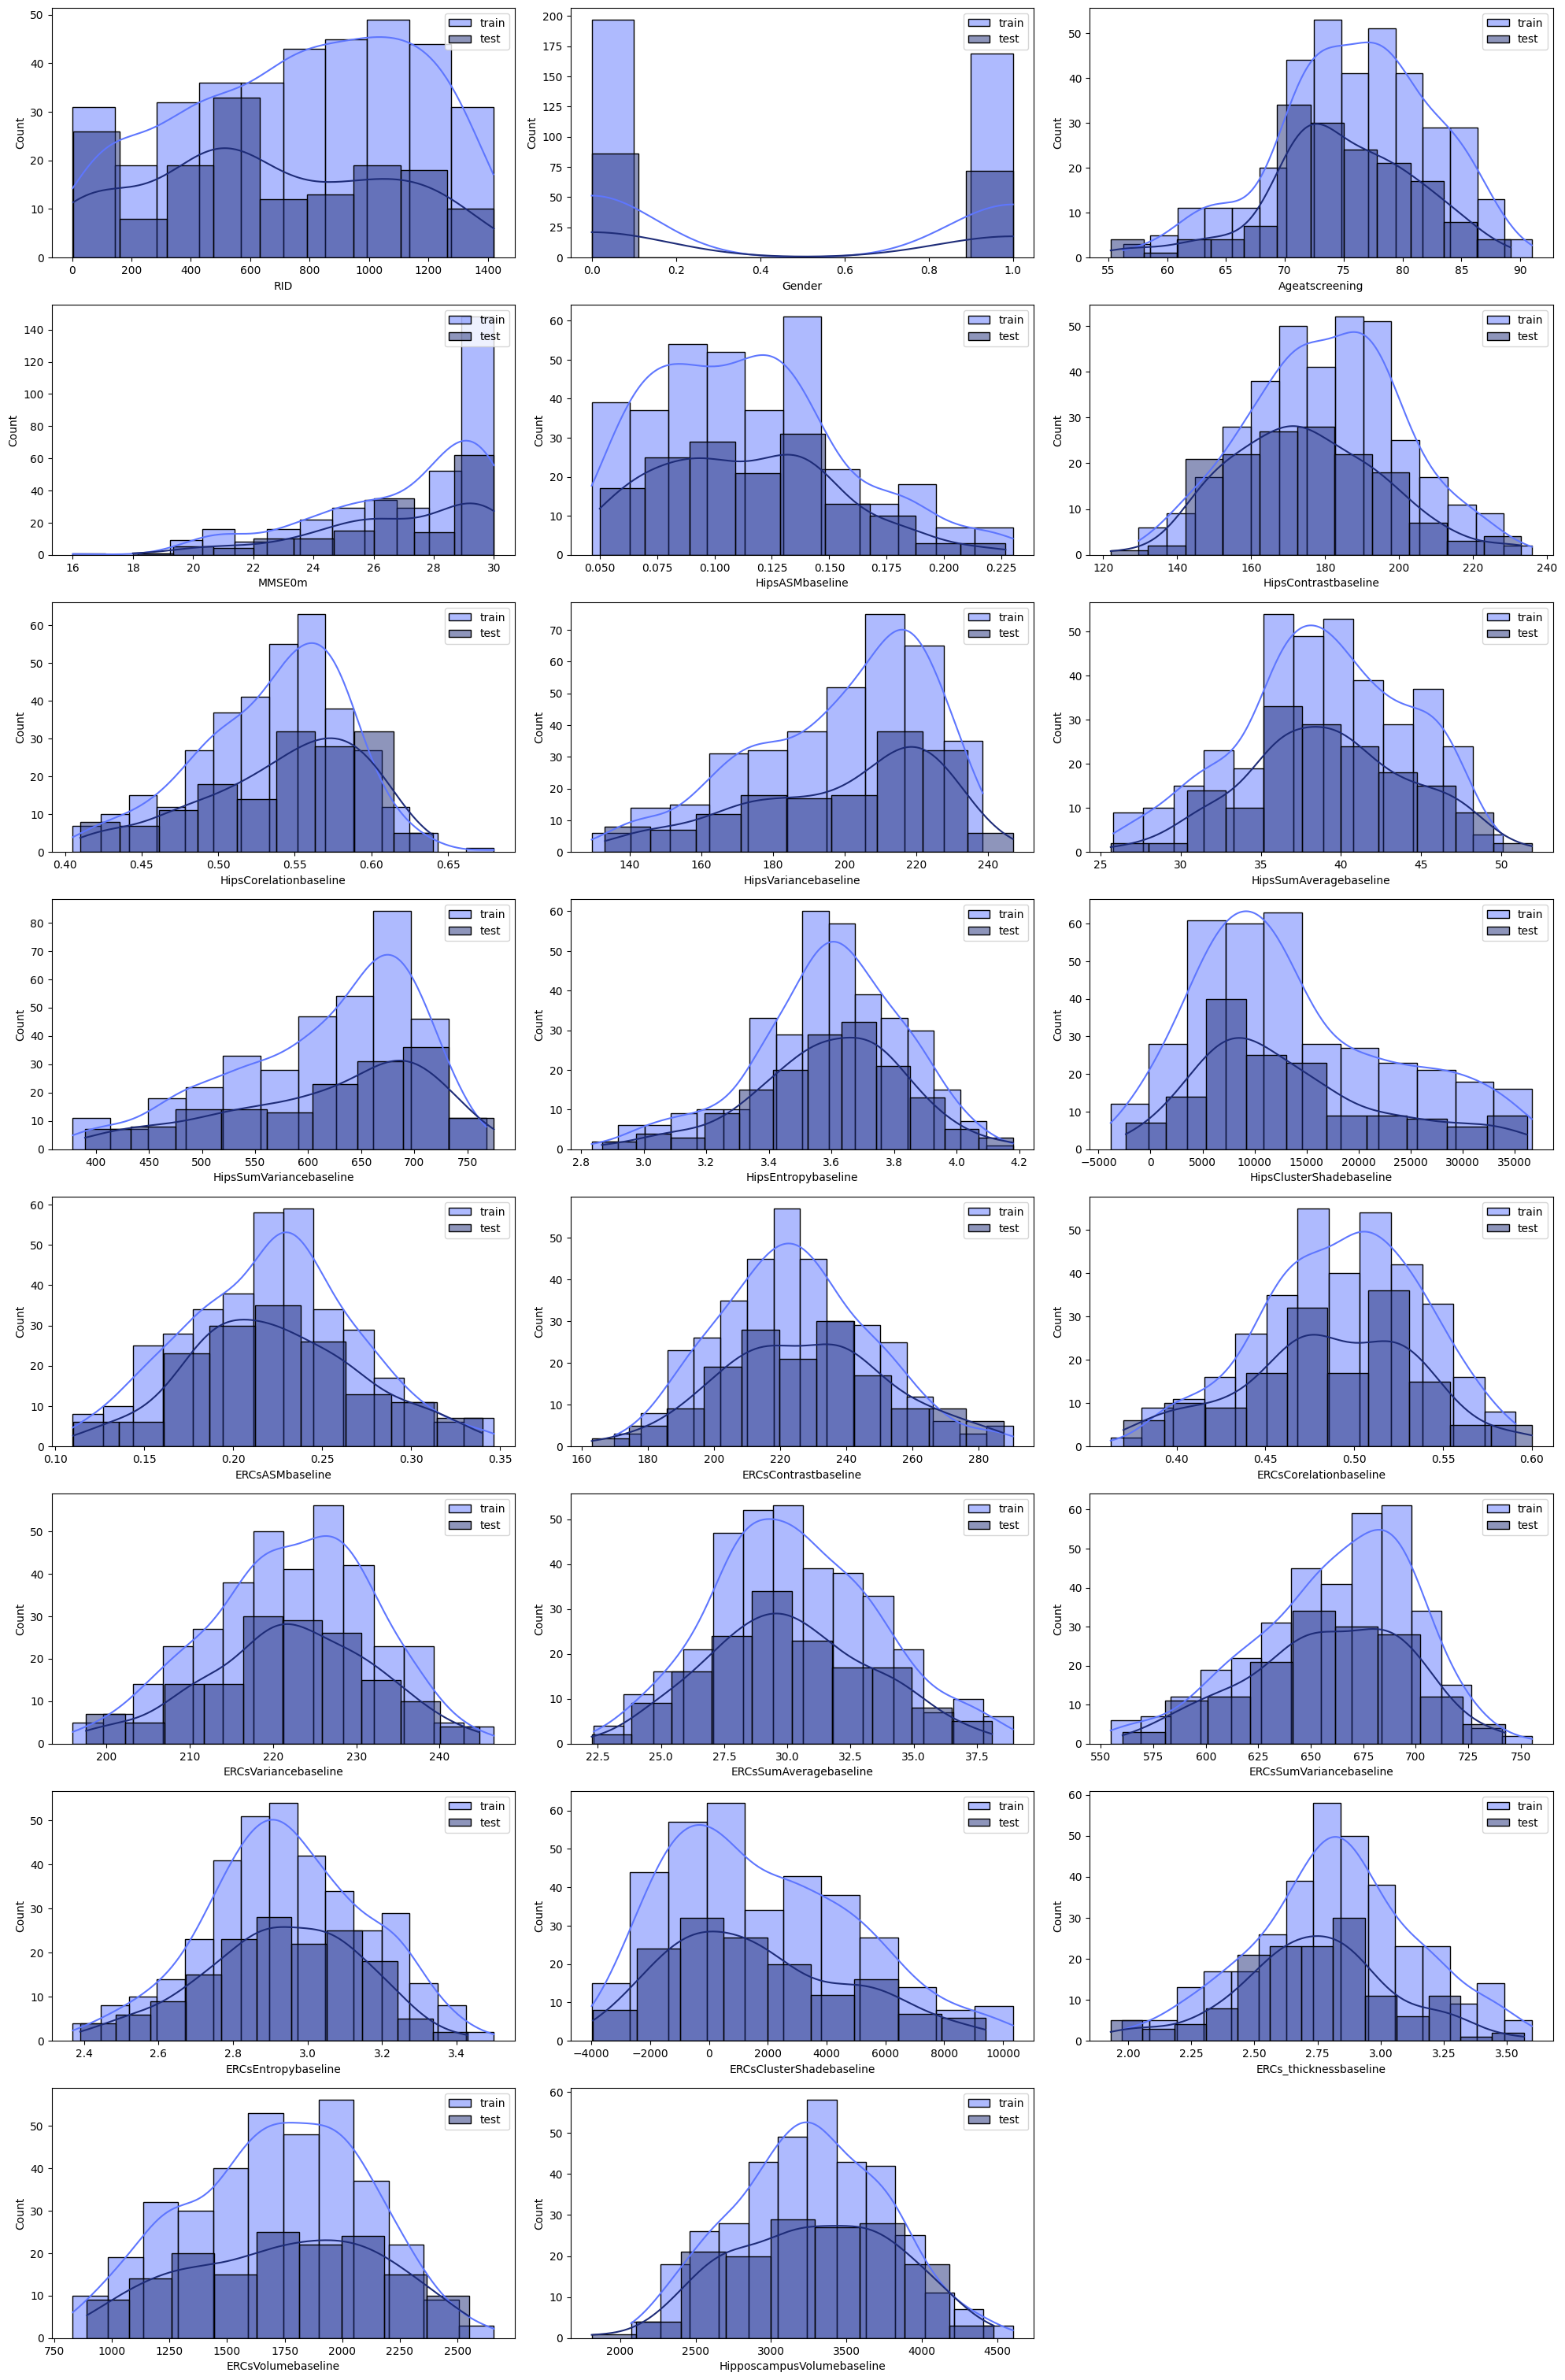

In [22]:
histogram_plot(dataset)

It appears that some observations are included in the test set while other values are excluded in the training set. 

The last graph is a good example - notice from left to right. 

Lets have a closer look

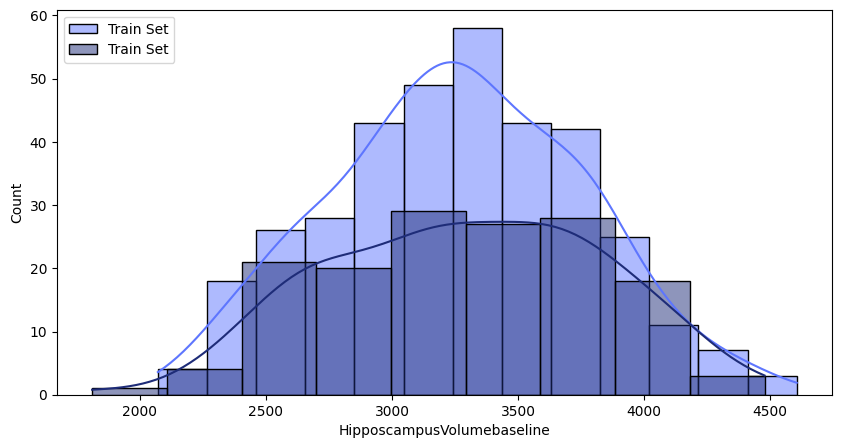

In [26]:
# Plot histogram of training/test set
plt.figure(figsize=(10, 5))

sns.histplot(X_train["HipposcampusVolumebaseline"], color="#5e76fe", kde=True, label='Train Set', alpha=0.5)
sns.histplot(X_test["HipposcampusVolumebaseline"], color="#1e2c78", kde=True, label='Train Set', alpha=0.5)
plt.legend(loc="upper left")

**This could be one of the few reasons why some of the models will underperform later on.**

Now lets check for the target split

In [24]:
y_train.value_counts()

Diagnosis
1    145
0    135
3     86
Name: count, dtype: int64

In [25]:
y_test.value_counts()

Diagnosis
0    59
1    55
3    44
Name: count, dtype: int64

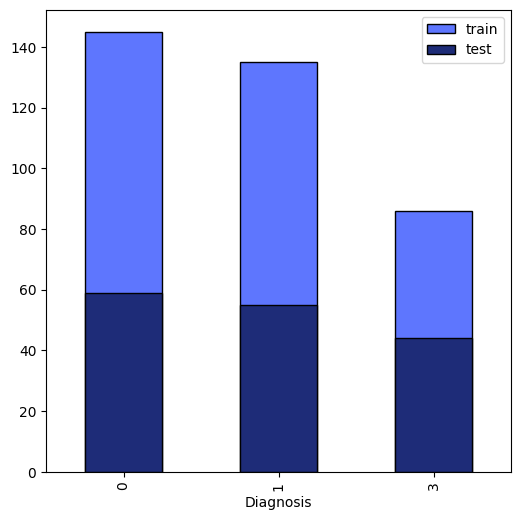

In [ ]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")